__Описание проекта__  

__В вашем распоряжении данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.__  
__Ваша задача — выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.__  
__О каждой квартире в базе содержится два типа данных: добавленные пользователем и картографические. Например, к первому типу относятся площадь квартиры, её этаж и количество балконов, ко второму — расстояния до центра города, аэропорта и ближайшего парка.__  

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


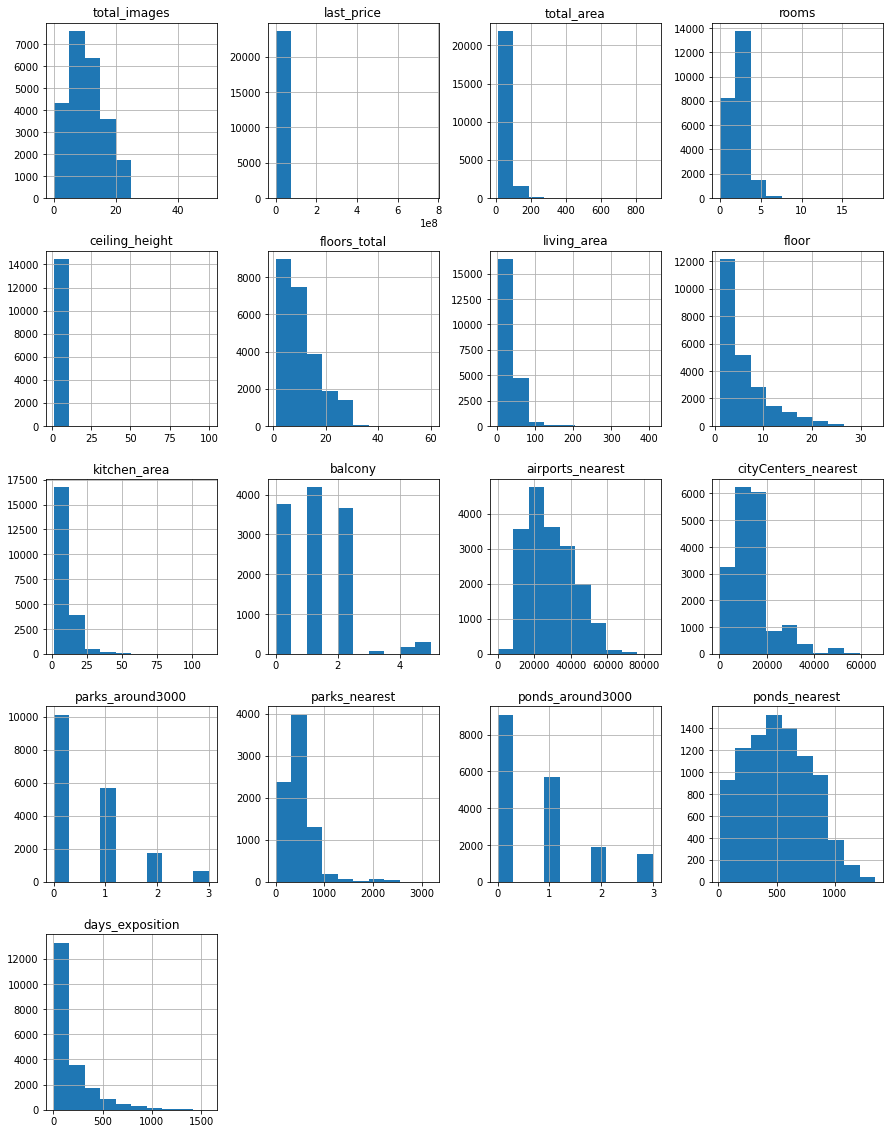

In [392]:
import pandas as pd
data=pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
data.info()
data.hist(figsize=(15,20))
data.head()

__Вывод:__  

_На первый взгляд данные кажутся нормальными. в глаза бросается дата в __first_day_exposition__ ,которую следует привести к типу datetame.И конечно наличие пропусков. Гистограммы на первый взгляд отображают нормальное распределение_

### Предобработка данных

In [347]:
data['balcony']=data['balcony'].fillna(0)

In [348]:
data.loc[(data['kitchen_area'].isna())&((data['studio']==1)|(data['is_apartment']==True)),'kitchen_area']=data.loc[(data['kitchen_area'].isna())&((data['studio']==1)|(data['is_apartment']==True)),'kitchen_area'].fillna(0)
data['kitchen_area'].isna().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21585 non-null  float64
 13  balcony               23699 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

__Заполнили нулем пропуски в площади кухни , если она-студия или апартаменты__

In [349]:
data['cityCenters_nearest'].isna().sum()

5519

In [350]:
data_pivot_center=data.pivot_table(index='locality_name',values='cityCenters_nearest',aggfunc='median')
data_pivot_center.columns=['center_median']
data_pivot_center
data_join=data.join(data_pivot_center, on='locality_name',rsuffix='_y')
data['center_median']=data_join['center_median']
try:
    data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(data['center_median'])
except:
    pass

data.head(20)

#data['cityCenters_nearest'].isna().sum()


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,center_median
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,12244.5
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,24212.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,12244.5
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,12244.5
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,12244.5
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0,NaN
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,19311.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,12244.5
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0,NaN
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,12244.5


__заполнили пропуски в расстоянии до центра медианным расстоянием до центра соответствующего нас. пункта__

In [351]:
data['airports_nearest'].isna().sum()

5542

In [352]:
data_pivot_airport=data.pivot_table(index='locality_name',values='airports_nearest',aggfunc='median')
data_pivot_airport.columns=['airport_median']
data_join1=data.join(data_pivot_airport, on='locality_name',rsuffix='_y')
data['airport_median']=data_join1['airport_median']
try:
    data['airports_nearest']=data['airports_nearest'].fillna(data['airport_median'])
except:
    pass

data['airports_nearest'].isna().sum()

5394

__заполнили прпуски в расстоянии до аэропорта медианными значениями соответствующего нас. пункта__

In [353]:
data['balcony']=data['balcony'].astype('int')

try:
    data['last_price']=data['last_price'].astype('int')
    data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
    data['floors_total']=data['floors_total'].astype('int')
    data['parks_around3000']=data['parks_around3000'].astype('int')
    data['ponds_around3000']=data['ponds_around3000'].astype('int')
    data['days_exposition']=data['days_exposition'].astype('int')
except:
    pass







In [354]:
duplicates = ['посёлок', 'поселок городского типа', 'посёлок городского типа','городской поселок','городской посёлок']
name = 'поселок'
def change_name(duplicates, name):
    for wrong_name in duplicates:
        data['locality_name'] = data['locality_name'].str.replace(wrong_name, name)
change_name(duplicates, name)

data=data.replace('Мурино','поселок Мурино')
data=data.replace('село Павлово','поселок Павлово')



    
len(data['locality_name'].unique())




321

In [355]:
data.loc[data['ceiling_height']>=10, 'ceiling_height']=data['ceiling_height']/10

len(data['ceiling_height'].unique())
data['ceiling_height'].describe()

data=data.loc[((data['ceiling_height']>2)&(data['ceiling_height']<6))|(data['ceiling_height'].isna())]
data['ceiling_height'].describe()



count    14481.000000
mean         2.727000
std          0.276707
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

__значения потолков больше 10 метров ,разделили на 10 И оставили только те строки ,где значения высоты потолков от 2 до 6 метров__  


In [356]:
data['last_price'].describe()
data.query('last_price<1000000')
data.loc[data['last_price']<1000000,'last_price']=data.loc[data['last_price']<1000000,'last_price']*10
data.query('last_price<1000000')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23698
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23676 non-null  int64         
 1   last_price            23676 non-null  int64         
 2   total_area            23676 non-null  float64       
 3   first_day_exposition  23676 non-null  datetime64[ns]
 4   rooms                 23676 non-null  int64         
 5   ceiling_height        14481 non-null  float64       
 6   floors_total          23590 non-null  float64       
 7   living_area           21775 non-null  float64       
 8   floor                 23676 non-null  int64         
 9   is_apartment          2772 non-null   object        
 10  studio                23676 non-null  bool          
 11  open_plan             23676 non-null  bool          
 12  kitchen_area          21566 non-null  float64       
 13  balcony         

__Объекты стоимостью меньше 1000000 решила умножить на 10__

In [357]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., nan, 20.,
       28., 36., 21., 35., 34., 60.,  1., 29., 33., 52.])

In [358]:
data['living_area'].describe()
#data.query('living_area<=6')

count    21775.000000
mean        34.459066
std         22.022673
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

In [393]:
data['total_area'].describe()


count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

### Посчитайте и добавьте в таблицу новые столбцы

In [360]:
def metr_price(row):  
    result=row['last_price']/row['total_area']
    return result
data['metr_price']=data.apply(metr_price,axis=1)
data.head(10)

data['weekday']=data['first_day_exposition'].dt.weekday
data.head(10)

data['month']=data['first_day_exposition'].dt.month
data.head()

data['year']=data['first_day_exposition'].dt.year
data.head()

def floor_type(row):
    if row['floor']==1:
        return 'первый'
    if row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    
data['floor_type']=data.apply(floor_type,axis=1)
data.head()





def weekday(day):
    if day==0:
        return 'понедельник'
    if day==1:
        return 'вторник'
    if day==2:
        return 'среда'
    if day==3:
        return 'четверг'
    if day==4:
        return 'пятница'
    if day==5:
        return 'суббота'
    if day==6:
        return 'воскресенье'
    
data['weekday']=data['weekday'].apply(weekday)
data.head()


def month_name(month):
    if month==1:
        return 'январь'
    if month==2:
        return 'февраль'
    if month==3:
        return 'март'
    if month==4:
        return 'апрель'
    if month==5:
        return 'май'
    if month==6:
        return 'июнь'
    if month==7:
        return 'июль'
    if month==8:
        return 'август'
    if month==9:
        return 'сентябрь'
    if month==10:
        return 'октябрь'
    if month==11:
        return 'ноябрь'
    if month==12:
        return 'декабрь'
    
data['month']=data['month'].apply(month_name)
data.head()

data['cityCenters_nearest_km']=data['cityCenters_nearest']/1000
data['cityCenters_nearest_km']=round(data['cityCenters_nearest_km'])


data.head() 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center_median,airport_median,metr_price,weekday,month,year,floor_type,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,12244.5,26757.5,120370.370370,четверг,март,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,81.0,24212.0,17427.0,82920.792079,вторник,декабрь,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,12244.5,26757.5,92785.714286,четверг,август,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,234.0,424.0,12244.5,26757.5,408176.100629,пятница,июль,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,12244.5,26757.5,100000.000000,вторник,июнь,2018,другой,8.0


In [361]:
data_pivot_year=data.pivot_table(index='year',values='days_exposition',aggfunc='count')
data_pivot_year


,days_exposition
year,
2014,119
2015,1120
2016,2715
2017,7912
2018,7550
2019,1083


In [362]:
data.query('year==2019')
data.query('year==2018')
data.query('year==2017')
data.query('year==2016')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,center_median,airport_median,metr_price,weekday,month,year,floor_type,cityCenters_nearest_km
12,10,3890000,54.0,2016-06-30,2,NaN,5.0,30.0,5,NaN,...,NaN,90.0,NaN,NaN,72037.037037,четверг,июнь,2016,последний,NaN
14,1,4400000,36.0,2016-06-23,1,NaN,6.0,17.0,1,NaN,...,96.0,203.0,27930.5,15766.0,122222.222222,четверг,июнь,2016,первый,31.0
17,6,4180000,36.0,2016-09-09,1,NaN,17.0,16.5,7,NaN,...,859.0,571.0,12244.5,26757.5,116111.111111,пятница,сентябрь,2016,другой,15.0
23,11,2950000,32.0,2016-10-29,1,2.60,9.0,17.7,9,NaN,...,190.0,615.0,12244.5,26757.5,92187.500000,суббота,октябрь,2016,последний,14.0
29,9,8600000,100.0,2016-04-09,3,NaN,19.0,52.0,15,False,...,896.0,125.0,12244.5,26757.5,86000.000000,суббота,апрель,2016,другой,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23676,19,3550000,36.4,2016-06-08,1,NaN,16.0,14.9,13,NaN,...,NaN,70.0,12244.5,26757.5,97527.472527,среда,июнь,2016,другой,12.0
23678,10,3500000,43.0,2016-05-19,2,2.50,3.0,26.1,2,False,...,1134.0,252.0,27930.5,15766.0,81395.348837,четверг,май,2016,другой,28.0
23682,11,2350000,35.6,2016-06-23,1,2.50,5.0,17.0,4,False,...,NaN,40.0,NaN,NaN,66011.235955,четверг,июнь,2016,другой,NaN
23691,11,9470000,72.9,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,806.0,519.0,12244.5,26757.5,129903.978052,четверг,октябрь,2016,другой,4.0


In [363]:
data.query('year==2019')['days_exposition'].max()

110.0

In [364]:
data['days_exposition'].isna().sum()

3177

In [365]:
data['days_exposition']=data['days_exposition'].fillna(110)
data['days_exposition'].isna().sum()

0

__Посчитав количество пропущенных значений в столбце _days_exposition_ по годам -увидела,что самое большое количество пропусков в 2019 году(половина значений),далее в 2018 году и в 2017 году.Пришла к выводу ,что это  может быть связано с тем ,что при выгрузке данных объявления еще не были сняты и поэтому можно их заполнить максимальным значением _days_exposition_ 2019 года__

In [366]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23676 entries, 0 to 23698
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            23676 non-null  int64         
 1   last_price              23676 non-null  int64         
 2   total_area              23676 non-null  float64       
 3   first_day_exposition    23676 non-null  datetime64[ns]
 4   rooms                   23676 non-null  int64         
 5   ceiling_height          14481 non-null  float64       
 6   floors_total            23590 non-null  float64       
 7   living_area             21775 non-null  float64       
 8   floor                   23676 non-null  int64         
 9   is_apartment            2772 non-null   object        
 10  studio                  23676 non-null  bool          
 11  open_plan               23676 non-null  bool          
 12  kitchen_area            21566 non-null  float6

__Вывод_1:__  
_Возможно, наличие пропусков связано с тем ,что пользователь не знал как заполнить некоторые параметры_  

  

__Вывод_2:__  

_Привели значения столбца __first_day_exposition__ к datetime, что бы визуально было красивее и понятнее, а так же в дальнейшем ,что бы можно было проводить с датой операции и подсчеты_  

_Привели значения столбцов ,содержащие целые значения и не содержащие пропуски  к типу int_  

__Вывод_3:__  

_В столбце __ceiling_hight__ заменили  числа больше 10  , на соответствующие  вещественные(разделили на 10). А так же удалили строки с необычно низкими значениями высоты потолков и необычно высокими (оставили значения от 2 до 6 метров)_  

_В столбце __last_price__ умножили значения меньше 1000000 на 10_



### Проведите исследовательский анализ данных

count    23676.000000
mean        60.354395
std         35.656115
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

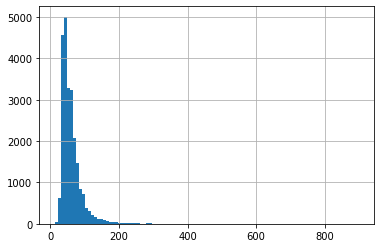

In [367]:
import matplotlib.pyplot as plt
data['total_area'].hist(bins=100)

data['total_area'].describe()

count    21775.000000
mean        34.459066
std         22.022673
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

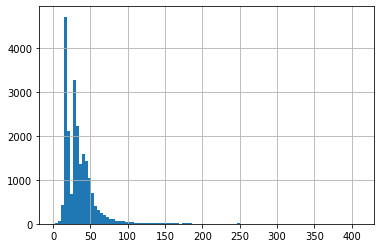

In [368]:
data['living_area'].hist(bins=100)

data['living_area'].describe()


count    21566.000000
mean        10.490763
std          5.956096
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

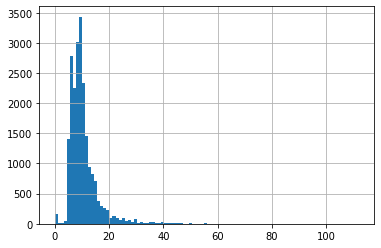

In [369]:
data['kitchen_area'].hist(bins=100)
data['kitchen_area'].describe()


count    2.367600e+04
mean     6.604409e+06
std      1.085403e+07
min      1.219000e+05
25%      3.490000e+06
50%      4.700000e+06
75%      6.890000e+06
max      7.630000e+08
Name: last_price, dtype: float64

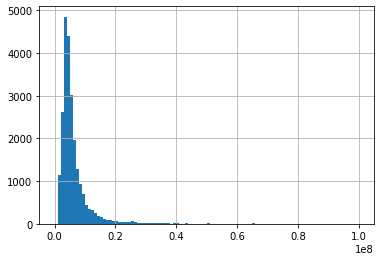

In [370]:
data['last_price'].hist(bins=100,range=(0,100000000))

data['last_price'].describe()


array([ 3,  1,  2,  4,  5,  6,  0,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

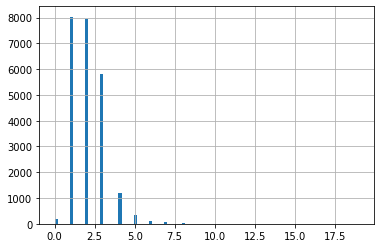

In [371]:
data['rooms'].hist(bins=100)
data['rooms'].describe()
data['rooms'].unique()
#data.query('rooms==0')
#data1=data.pivot_table(index='rooms',values='studio',aggfunc='sum')
#data1

count    14481.000000
mean         2.727000
std          0.276707
min          2.200000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.800000
Name: ceiling_height, dtype: float64

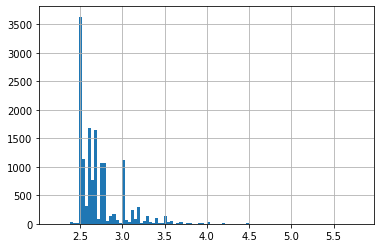

In [372]:
data['ceiling_height'].hist(bins=100)
data['ceiling_height'].describe()

count    23676.000000
mean         5.892169
std          4.885778
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

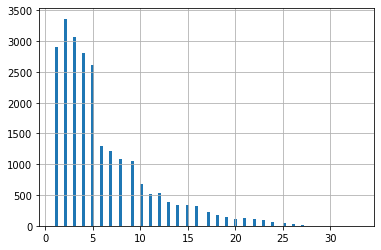

In [373]:
data['floor'].hist(bins=100)
data['floor'].describe()

<AxesSubplot:ylabel='floor_type'>

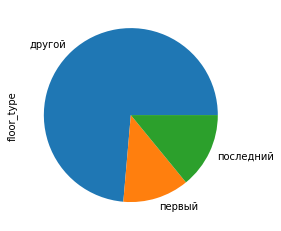

In [374]:
data_1=data.groupby('floor_type')['floor_type'].count()
data_1.plot(y='count',kind='pie')

count    23590.000000
mean        10.673633
std          6.595989
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

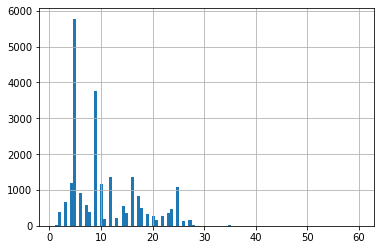

In [375]:
data['floors_total'].hist(bins=100)
data['floors_total'].describe()


count    18292.000000
mean     14231.659359
std       8627.216464
min        181.000000
25%       9273.250000
50%      13101.000000
75%      16327.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

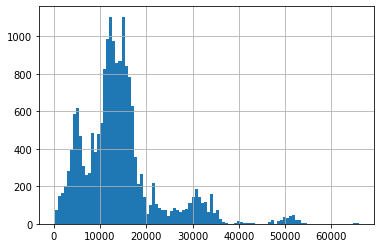

In [376]:
data['cityCenters_nearest'].hist(bins=100)
data['cityCenters_nearest'].describe()


count    18292.000000
mean     28865.473267
std      12676.013702
min          0.000000
25%      18641.000000
50%      26757.500000
75%      37322.750000
max      84869.000000
Name: airports_nearest, dtype: float64

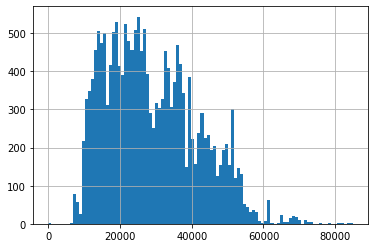

In [377]:
data['airports_nearest'].hist(bins=100)
data['airports_nearest'].describe()
#data.query('airports_nearest==0')

count    8071.000000
mean      490.768430
std       342.415081
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

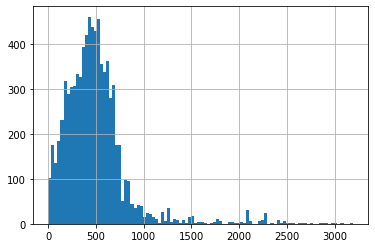

In [378]:
data['parks_nearest'].hist(bins=100) 
data['parks_nearest'].describe()

<AxesSubplot:>

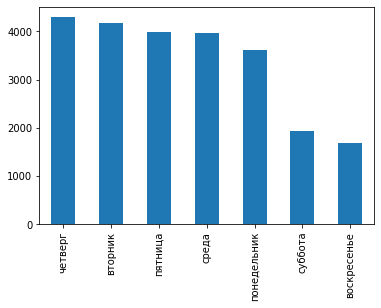

In [379]:
data['weekday'].value_counts().plot(kind='bar')

<AxesSubplot:>

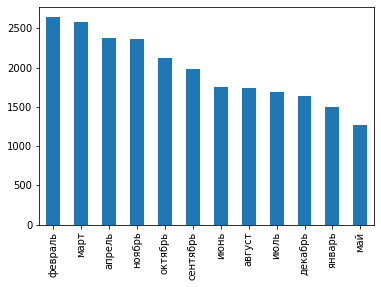

In [380]:
data['month'].value_counts().plot(kind='bar')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
11,9,3300000.0,44.0,2018-08-27T00:00:00,2,NaN,5.0,31.0,4,False,...,6.0,1.0,Ломоносов,48252.0,51677.0,0.0,NaN,0.0,NaN,7.0
53,7,4300000.0,39.1,2017-11-10T00:00:00,1,NaN,25.0,15.4,13,NaN,...,15.5,2.0,посёлок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
62,0,4800000.0,78.6,2017-09-17T00:00:00,3,2.80,9.0,48.8,5,NaN,...,11.9,2.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
94,3,3500000.0,29.5,2019-04-26T00:00:00,1,2.50,5.0,15.6,2,NaN,...,5.5,1.0,Санкт-Петербург,12921.0,7303.0,0.0,NaN,0.0,NaN,4.0
100,16,3800000.0,38.6,2018-02-22T00:00:00,1,NaN,9.0,18.0,6,NaN,...,8.4,2.0,Санкт-Петербург,36450.0,13364.0,0.0,NaN,0.0,NaN,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23513,12,8300000.0,62.6,2017-02-15T00:00:00,2,2.70,16.0,32.9,8,False,...,11.3,2.0,Санкт-Петербург,29077.0,10858.0,0.0,NaN,0.0,NaN,7.0
23596,10,3500000.0,43.5,2017-12-05T00:00:00,2,2.50,9.0,27.0,6,NaN,...,6.2,NaN,Санкт-Петербург,49094.0,16671.0,0.0,NaN,0.0,NaN,6.0
23606,0,2850000.0,68.0,2018-07-29T00:00:00,1,3.00,5.0,41.0,3,NaN,...,10.0,NaN,Санкт-Петербург,38473.0,7740.0,2.0,560.0,3.0,327.0,4.0
23647,9,5700000.0,45.6,2019-01-09T00:00:00,1,2.75,16.0,18.7,6,NaN,...,17.6,NaN,Санкт-Петербург,10934.0,12551.0,0.0,NaN,0.0,NaN,8.0


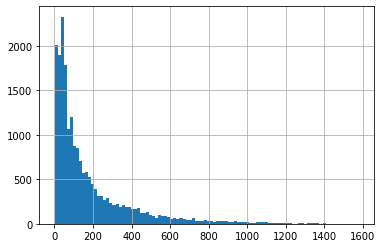

In [401]:
data['days_exposition'].hist(bins=100)
data['days_exposition'].describe()
data2=data.query('days_exposition<10')
data2

__Вывод_2:__  
_При взгляде на гистограмму __days_exposition__ заметно , что наибольшее количество объектов продавалось за примерно 110 дней . Там же находится и медиана. К необычайно долгим -я бы отнесла продажи более 600 дней , к необычайно быстрым -до 10 дней (таких всего 5 %) 

__Вывод 1:__  
_Гистограмма столбца __total_area__ напоминает нормальное распределение. Среднее и медиана не сильно отличаются.Больше всего значений на отметке примерно 55 кв.м. ,что похоже на правду_  

_Гистограмма столбца __living_area__ имеет 2 пика.(в районе 20 и 30 кв. метров)Что говорит о большом количестве объктов с такой жилой площадью на рынке.С помощью метода decribe было выявлено, что минимальный размер жилой площади составляет 2 кв.м. ,что очень мало,однако таких объектов всего 5 (с жилой площадью <=5 кв.м.) ,поэтому решила их оставить._  

_Гистограмма столбца __kitchen_area__ похоже на нормальное распределение. небольшой пик в районе 0 связан с тем ,что мы заполнили пропущенные значения 0-ем(при условии , что объект-студия или апартаменты)_

_Гистограмма столбца __last_price__ (при построении с параметром range=(0,100млн),т.к. максимальное значение в этой колонке 763 млн,а медиана-4млн 700тыс ) показывает ,что большинство значений -в районе 5-6 млн, более 20 млн -уже мало значений, более 40 млн -еще меньше. Что похоже на правду_  

_Гистограмма столбца __rooms__ отображает правдоподобную картину. Есть небольшое количество объектов с количеством комнат =0, и  -это студии (построив сводную таблицу методом pivot_table мы это увидели)_  

_Гистограмма столбца __ceiling_height__ выглядит правдоподобно. Минимальная высота потолков-2,2 метра,максимальная-5,8 метров. Медианное значение -2,6 метров_  

_Гистограмма столбца __floor__ -так же правдоподобна. Минимальное значение этажа-1,максимальное-33. Медианное значение -4_  

_Для анализа значений столбца __floor_type__ ,сначала применила к датафрейму  группировку по этому столбцу и с подсчетом значений в нем же и затем построила круговую диаграмму. Больше всего значений "другой"-это и было ожидаемо_  

_Гистограмма значений столбца __floors_total__ выглядит правдоподобно.Самые выдающиеся значения на отметке 5 и 9 (пятиэтажные и девятиэтажные дома)_  

_Гистограмма значений столбца __cityCenters_nearest__ выглядит правдоподбно. Самые выдающиеся значения на отметке примерно 13000 метров и 15000. Примерно там же  медиана и среднее_  

_Гистограмма значений столбца __airports_nearest__ выглядит правдоподобно_

_Гистограмму значений столбца __parks_nearest__  достаточно реалистична. Наибольшее количество значений в промежутке 300-500 метров_  

_Для анализа значений столбца __weekday__ построили столбчатую диаграмму. Глядя на нее,заметно , что в четверг и вторник размещают чуть больше объявлений чем в остальные будние дни. В субботу и воскресенье размещают значительно меньше объявлений_  

_Для анализа значений столбца __month__ так же построили столбчатую диаграмму,из которой видно , что наибольшее количество объявлений размещаются в феврале и марте , меньше всего объявлений-в мае_  



0.6514735774436485

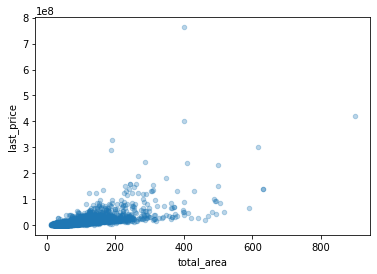

In [382]:
data.plot(x='total_area',y='last_price',kind='scatter',alpha=0.3)
data['total_area'].corr(data['last_price'])


__Вывод 3:__

_Построив диаграмму рассеяния для определяния зависимости между величинами last_price и total_area , можно увидеть ,что для объектов с площадью примерно до 250 кв.м есть прямая зависимость (с ростом площади растет и цена). Так же об этом говорит и значение коэффицента корреляции Пирсона(0.6514735774436485).Так же есть небольшое количество объектов (с площадью больше 240 кв.м,у которых цена имеет большой размах,т.е. мало зависит от площади)_

0.5643942251248595

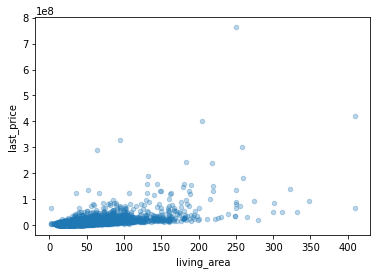

In [383]:
data.plot(x='living_area',y='last_price',kind='scatter',alpha=0.3)
data['living_area'].corr(data['last_price'])

_По диаграмме рассеяния для величин __living_area__ и __last_price__ ,можно увидеть ,что для объектов с жилой площадью примерно до 165 кв.м. есть прямая зависимость с ценой. Коэфиицент Пирсона составляет 0.5643942251248595_  

0.5157786747877862

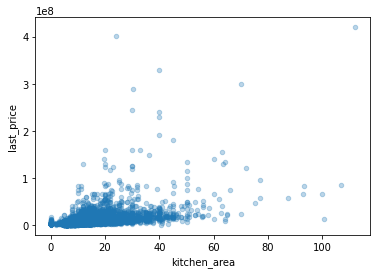

In [384]:
data.plot(x='kitchen_area',y='last_price',kind='scatter',alpha=0.3)
data['kitchen_area'].corr(data['last_price'])


_По диаграмме рассеяния для величин __kitchen_area__ и __last_price__, можно увидеть , что для объектов с площадью кухни примерно до 47 кв.м. есть прямая зависимость с ценой (коэффицент Пирсона составляет 0.5157786747877862). Так же есть выдающиеся совпадения в райрне 20 метров (рост цены )-что говорит о некоторой востребованности объектов размером кухни около 20 метров_

<AxesSubplot:xlabel='rooms'>

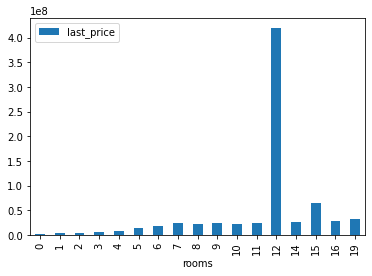

In [385]:
data_pivot_rooms=data.pivot_table(index='rooms',values='last_price',aggfunc='median')
data_pivot_rooms
data_pivot_rooms.plot(kind='bar')
#data.query('rooms==12')

_Для нахождения зависимости между количеством комнат __rooms__ и __last_price__ ,сначала я вывела сводную таблицу ,которая для каждого значения количества комнат посчитает медианное значение цены.И затем построила по сводной таблице столбчатую диаграмму.На диаграмме видно ,что объекты с количеством комнат до 7 -имеют прямую зависимость с ценой. Если комнат больше-уже прямой  зависимости скорее нет .Есть выдающееся значение цены на объекте с 12 комнатами (он всего один)_ 

<AxesSubplot:xlabel='floor_type'>

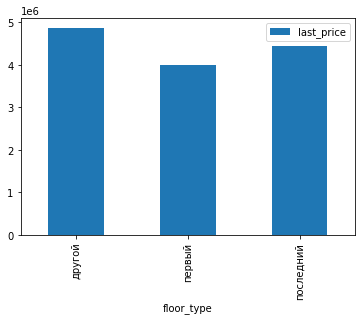

In [386]:
data_pivot_floor_type=data.pivot_table(index='floor_type',values='last_price',aggfunc='median')
data_pivot_floor_type.plot(kind='bar')

_Для нахождения зависимости между типом этажа __floor_type__ и __last_price__ ,я так же построила столбчатую диаграмму по сводной таблице с медианными значениями цены. По ней видно ,что объекты с типом этажа "другой" немного дороже остальных, с типом этажа "первый" -немного дешевле остальных, а "последний"-между ними_   

<AxesSubplot:xlabel='weekday'>

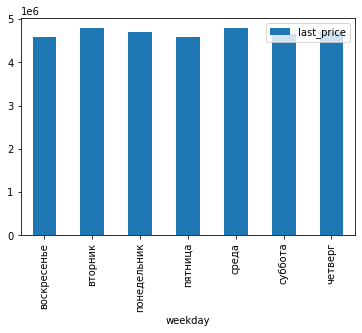

In [387]:

data_pivot_weekday=data.pivot_table(index='weekday',values='last_price',aggfunc='median')
data_pivot_weekday.plot(kind='bar')


_Для нахождения зависимости между днем недели публикации объявления __weekday__ и __last_price__ ,я так же построила столбчатую диаграмму по сводной таблице с медианными значениями цены. По ней видно ,что зависимости между этими параметрами нет-медианное значение цены везде примерно одинаковая_ 

<AxesSubplot:xlabel='month'>

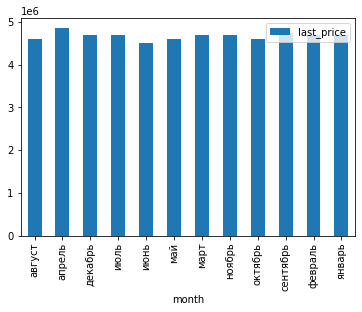

In [388]:
data_pivot_month=data.pivot_table(index='month',values='last_price',aggfunc='median')
data_pivot_month.plot(kind='bar')

_По столбчатой диаграмме ,построенной по сводной таблице со значениями месяца публикации объявления __month__ и медианными значениями цены, видно , что сильных отличий цены по месяцам публикации объявления нет . Можно заметить только ,что цена объявлений опубликованных в апреле немного выше остальных, а в июне-немного ниже остальных_  


<AxesSubplot:xlabel='year'>

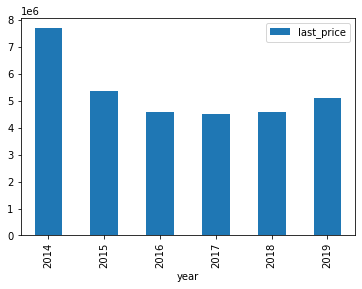

In [389]:
data['year'].unique()
data_pivot_year=data.pivot_table(index='year',values='last_price',aggfunc='median')
data_pivot_year.plot(kind='bar')

_По столбчатой диаграмме ,построенной по сводной таблице со значениями года публикации объявления __year__ и медианными значениями цены, видно , что самые высокие цены на недвижимость были в 2014 году, самые низкие -в 2016, 2017 и в 2018 годах_ 


In [390]:
data_pivot_locality=data.pivot_table(index='locality_name',values='metr_price',aggfunc=['count','median'])
data_pivot_locality.columns=['count','price_median']
data_pivot_locality.sort_values(by='count',ascending=False).head(10)

,count,price_median
locality_name,,
Санкт-Петербург,15710,104761.904762
поселок Мурино,590,86175.643522
поселок Шушары,440,76876.172608
Всеволожск,397,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
поселок Парголово,327,91642.857143
Гатчина,307,67924.528302
деревня Кудрово,299,91860.465116


__Вывод_4__  

_Построив сводную таблицу из названий населенного пункта , медианного значения цены квадратного метра __metr_price__ для каждого населенного пункта и количества объявлений для каждого населенного пункта, я отсортировала ее по убыванию значений количества объявлений и вывела первые 10-населенные пункты с наибольшим количеством объявлений_  
_Из этой таблицы видно, что самая высокая цена за метр-в Санкт-Петербурге и Пушкино( 104 и 100 тыс.), а самая низкая -в Выборге(около 58 тыс )_

116003.24586716175

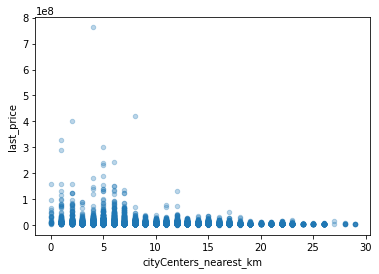

In [391]:
data['price_km_center']=data['last_price']/data['cityCenters_nearest_km']
data_st_petersburg=data.loc[data['locality_name']=='Санкт-Петербург']
data_st_petersburg.plot(x='cityCenters_nearest_km',y='last_price',kind='scatter',alpha=0.3)
data_st_petersburg['cityCenters_nearest_km'].corr(data_st_petersburg['last_price'])
data_st_petersburg['price_km_center'].median()*0.257784990815915


__Вывод_5__  

_Из гистограммы рассеяния для величин __cityCenters_nearest_km__ и __last_price__ видно что у этих величин обратная зависимость,хоть и небольшая  (при росте расстояния от центра ,стоимость уменьшается),коэффицент корреляции Пирсона так же об этом говорит (-0,25)_  
_Для нахождения примерной стоимости 1 километра до центра , я создала новый столбец __price_km_center__ ,значения которого-отношение цены к расстоянию до центра в километрах , и нашла медианное значение этого столбца.Затем умножила его на коэффицент корелляции и получила примерно 116003-примерная стоимость 1 км до центра_

### Общий вывод  

_В ходе исследовательского анализа данных :объявлений о прадаже квартир в Санкт Петербурге и соседних районах,я выявила ,что :_  

_-Общая,жилая и площадь кухни достаточно сильно влияют на стоимость объекта(коэф. корреляции около 0,5)_


 _-Количество комнат в объекте -при их количестве :до 7 имеют прямую зависимость с ценой (если их больше-прямой зависимости нет)_  

_-Объекты ,расположенные на 1 и последнем этажах немного дешевле остальных_  

_-День недели публикации не влияет на стоимость объявления_  

_-Объявления опубликованные в апреле немного дороже остальных, а опубликованные в июне -немного дешевле_ 

_-В 2014 году были самые высокие цены на недвижимость , в 2016,2017 и в 2018 годах-самые низкие_  

_-Наибольшее количество объявление продается за 110 дней_  

_-Проанализировав 10 населенных пунктов с наибольшим количеством объявлений , я выявила ,что самая высокая цена за кв. метр в Санкт-Петербурге и и Пушкино( 104 и 100 тыс.), а самая низкая -в Выборге(около 58 тыс )_  

_-Удаленность от центра так же влияет на стоимость объекта , в Санкт петербурге примерная стоимость 1 км до центра 116003_  
